In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance (2).csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
cat_cols=df.select_dtypes([object])
num_cols=df.select_dtypes(exclude=[object])

In [35]:
cat_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [9]:
for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')
    

sex
male      676
female    662
Name: sex, dtype: int64
--------------------------------------------------------------------------
smoker
no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
--------------------------------------------------------------------------


## Data Visualization

<AxesSubplot:xlabel='sex', ylabel='count'>

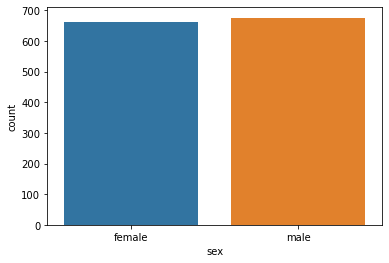

In [10]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='sex', ylabel='count'>

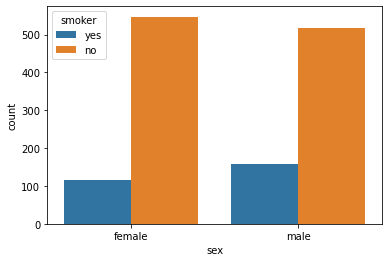

In [11]:
sns.countplot(df['sex'],hue=df['smoker'])

<AxesSubplot:xlabel='sex', ylabel='count'>

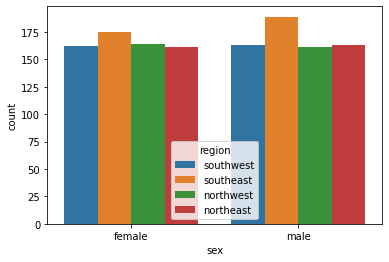

In [12]:
sns.countplot(df['sex'],hue=df['region'])

<AxesSubplot:xlabel='children', ylabel='count'>

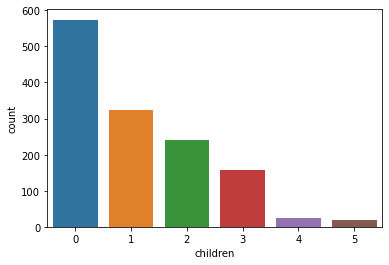

In [13]:
sns.countplot(df['children'])

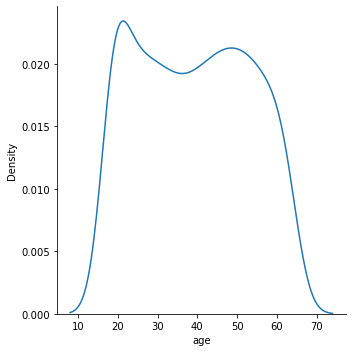

In [14]:
sns.displot(df['age'],kind='kde')

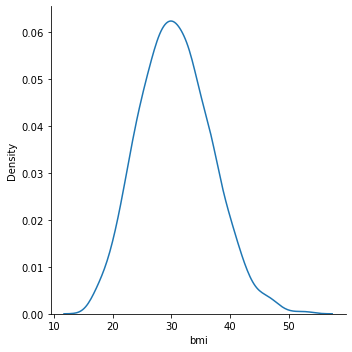

In [15]:
sns.displot(df['bmi'],kind='kde')

In [16]:
#Checking for correlation
corr=df.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

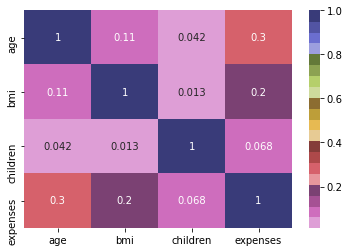

In [17]:
sns.heatmap(corr,annot=True,cmap='tab20b_r')

## Encoding

In [18]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
list_cat=list(cat_cols.columns)
df[list_cat] = df[list_cat].apply(le.fit_transform)

In [20]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [22]:
scaled=ss.fit_transform(df.drop('expenses',axis=1))
scaled

array([[-1.43876426, -1.0105187 , -0.4536457 , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.51418574, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38295436,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02270734, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79812808, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.25679863, -0.90861367,  1.97058663,
        -0.46691549]])

In [23]:
df_ss=pd.DataFrame(scaled)
df_ss=pd.concat([df_ss,df['expenses']],axis=1)
df_ss

,0,1,2,3,4,5,expenses
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905,16884.92
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495,1725.55
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495,4449.46
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915,21984.47
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915,3866.86
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.054876,1.580926,-0.507463,-0.466915,10600.55
1334,-1.509965,-1.010519,0.202511,-0.908614,-0.507463,-1.372326,2205.98
1335,-1.509965,-1.010519,1.022707,-0.908614,-0.507463,0.438495,1629.83
1336,-1.296362,-1.010519,-0.798128,-0.908614,-0.507463,1.343905,2007.95


## Model Building

In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
x=df.drop(['expenses'],axis=1)
y=df[['expenses']]

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [27]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
x_train.shape,y_train.shape

((936, 6), (936, 1))

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y1_pred=lr.predict(x_test)

print('---------------------------')
print('MSE:',mean_squared_error(y_test,y1_pred))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y1_pred))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y1_pred)))
print('---------------------------')
print('R2:',r2_score(y_test,y1_pred))

---------------------------
MSE: 33304881.694371693
---------------------------
MAE : 4013.547351374277
---------------------------
RMSE: 5771.0381816768195
---------------------------
R2: 0.791151983192236


### Decision Tree Regressor

In [31]:
dt_model=DecisionTreeRegressor()  
dt_model.fit(x_train,y_train)

y4_pred=dt_model.predict(x_test)



print('---------------------------')
print('MSE:',mean_squared_error(y_test,y4_pred))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y4_pred))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y4_pred)))
print('---------------------------')
print('R2:',r2_score(y_test,y4_pred))

---------------------------
MSE: 43763413.5121204
---------------------------
MAE : 3049.9958208955227
---------------------------
RMSE: 6615.392166162215
---------------------------
R2: 0.7255686957660314


### Random Forest Regressor

In [32]:
rf_model=RandomForestRegressor() 
rf_model.fit(x_train,y_train)

y5_pred=rf_model.predict(x_test)


print('---------------------------')
print('MSE:',mean_squared_error(y_test,y5_pred))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y5_pred))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y5_pred)))
print('---------------------------')
print('R2:',r2_score(y_test,y5_pred))

---------------------------
MSE: 22090304.56060469
---------------------------
MAE : 2823.6076332515995
---------------------------
RMSE: 4700.032399952653
---------------------------
R2: 0.8614762742441613


In [33]:
def metrics(model,pred):
    print("------------------------------------------------------------------------")
    print(model,"r2_score :",r2_score(y_test,pred))
    print(model,"mae :",mean_absolute_error(y_test,pred))
    print(model,"mse :",mean_squared_error(y_test,pred))
    print(model,"rmse :",np.sqrt(mean_squared_error(y_test,pred)))

In [34]:
metrics(lr,y1_pred)
metrics(dt_model,y4_pred)
metrics(rf_model,y5_pred)

------------------------------------------------------------------------
LinearRegression() r2_score : 0.791151983192236
LinearRegression() mae : 4013.547351374277
LinearRegression() mse : 33304881.694371693
LinearRegression() rmse : 5771.0381816768195
------------------------------------------------------------------------
DecisionTreeRegressor() r2_score : 0.7255686957660314
DecisionTreeRegressor() mae : 3049.9958208955227
DecisionTreeRegressor() mse : 43763413.5121204
DecisionTreeRegressor() rmse : 6615.392166162215
------------------------------------------------------------------------
RandomForestRegressor() r2_score : 0.8614762742441613
RandomForestRegressor() mae : 2823.6076332515995
RandomForestRegressor() mse : 22090304.56060469
RandomForestRegressor() rmse : 4700.032399952653


From the above results we can see that random forest regressor is working good for us 